In [6]:
from pulp import *

def shortest_path_LP(dist, spot, start, end):
    if start == end:
        return [], 0
    else:
        # The cost data is made into a dictionary
        dist = makeDict([spot, spot], dist, 0)
        Routes = [(out, enter) for out in spot for enter in spot]

        # Linear programming---------------------------------------------------------------------------------------------
        prob = LpProblem("Shortest Path Problem", LpMinimize)
        var = LpVariable.dicts('Route', (spot, spot), lowBound=0, upBound=1, cat='Integer')

        # Constraints
        for o in spot:
            if o == start:
                prob += lpSum(var[o][e]-var[e][o] for e in spot) == 1
            elif o == end:
                prob += lpSum(var[o][e]-var[e][o] for e in spot) == -1
            else:
                prob += lpSum(var[o][e]-var[e][o] for e in spot) == 0

        # Objective function
        prob += lpSum(var[out][enter] * dist[out][enter] for (out, enter) in Routes)
        prob.solve()
        #----------------------------------------------------------------------------------------------------

        minValue = value(prob.objective)  # Optimal solution

        # obtain all the paths which varValue=1 
        vList = [] 
        for v in prob.variables():
            if v.varValue == 1:
                pointFROM = v.name.split('_')[1]
                pointTO = v.name.split('_')[2]
                vList.append([v.name, v.varValue, pointFROM, pointTO])        

        return vList, minValue


# Sorting    
def sort(vlst, sList):
    for i in vlst:
        if i[0] == sList[-1]:
            sList.append(i[1])
            return sort(vlst, sList)
        

In [7]:
import random
import numpy as np

n = 250   # number of points 
dimension = 2    
ptXY = np.random.randint(0, 300, size=[dimension, n])  # randomly generate n points

#print(ptXY)

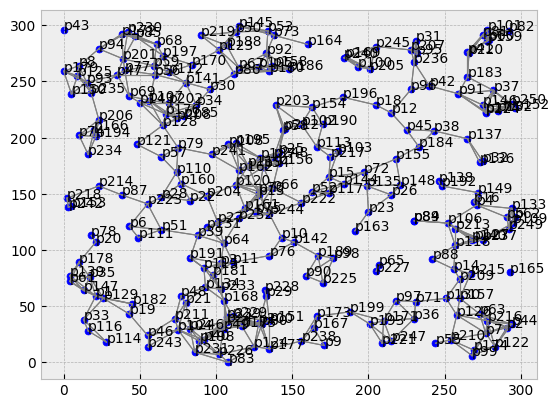

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

epsilon = 25     # identify the value for epsilon-nearest neighbors 
inf = 9999

distMtx = np.zeros((n,n), dtype=float)    # distance matrix

for i in range(n):
    for j in range(n):
        distance=0
        for d in range(dimension):
            distance += (ptXY[d][i]-ptXY[d][j])**2  
        distance = distance**0.5   # the distance between 2 points

        if distance <= epsilon:   
            if distance == 0:
                distMtx[i][j] = round(inf, 0)
            else:
                distMtx[i][j] = round(distance, 2)
        else:
            distMtx[i][j] = round(inf, 0)

x, y, = ptXY[0], ptXY[1] 

plt.style.use('bmh')   # grid lines
fig = plt.figure()
ax = plt.axes()        # scale
plt.scatter(x, y, s=25, color='b') 
    
# adjacent lines    
for i in range(n):
    for j in range(n):
        if distMtx[i][j] <= epsilon:
            if distMtx[i][j] > 0:
                X = [ptXY[0][i], ptXY[0][j]]
                Y = [ptXY[1][i], ptXY[1][j]]
                plt.plot(X, Y, color='#808080', linewidth=0.8)
                
# point name
ptName = (['p{}'.format(i+1) for i in range(n)])
for i in range(n):
    ax.annotate(ptName[i], (ptXY[0][i], ptXY[1][i]))

#print(distMtx)
#plt.savefig('C:\\Users\\')

c:\Users\johnn\AppData\Local\Programs\Python\Python311\Lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Route_p106_p118 = 1.0
Route_p117_p144 = 1.0
Route_p118_p14 = 1.0
Route_p124_p175 = 1.0
Route_p12_p96 = 1.0
Route_p130_p71 = 1.0
Route_p144_p72 = 1.0
Route_p146_p250 = 1.0
Route_p14_p209 = 1.0
Route_p155_p184 = 1.0
Route_p168_p233 = 1.0
Route_p171_p199 = 1.0
Route_p173_p238 = 1.0
Route_p175_p229 = 1.0
Route_p177_p124 = 1.0
Route_p184_p45 = 1.0
Route_p199_p173 = 1.0
Route_p209_p130 = 1.0
Route_p222_p117 = 1.0
Route_p229_p168 = 1.0
Route_p232_p244 = 1.0
Route_p233_p3 = 1.0
Route_p238_p177 = 1.0
Route_p244_p222 = 1.0
Route_p3_p64 = 1.0
Route_p42_p91 = 1.0
Route_p45_p12 = 1.0
Route_p64_p232 = 1.0
Route_p71_p97 = 1.0
Route_p72_p155 = 1.0
Route_p89_p106 = 1.0
Route_p91_p146 = 1.0
Route_p96_p42 = 1.0
Route_p97_p171 = 1.0
The distance of the shortest path : 635.3199999999999
Shortest Path: p89 p106 p118 p14 p209 p130 p71 p97 p171 p199 p173 p238 p177 p124 p175 p229 p168 p233 p3 p64 p232 p244 p222 p117 p144 p72 p155 p184 p45 p12 p96 p42 p91 p146 p250 

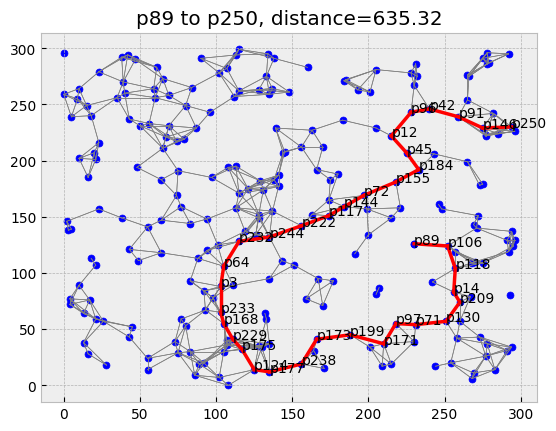

In [10]:
start, end = 'p89', 'p250'

vData, result = shortest_path_LP(distMtx, ptName, start, end)

for v in vData:
    if v[1] != 0:
        print (v[0], "=", v[1])
        
# order the path
sortedList = [start]
varlist=[]
for v in vData:
    varlist.append([v[2], v[3]])
sort(varlist, sortedList)     

if result >= inf:
    print ('The distance of the shortest path : none')
    print('There is no shortest path')
else:
    print ('The distance of the shortest path :', result)
    print('Shortest Path:', end = ' ')
    for i in sortedList:
        print(i,end = " ") 

#----------------------------plot-----------------------------------------    
plt.style.use('bmh')
ax = plt.axes() 
plt.title('{} to {}, distance={}'.format(start,end,round(result,2)))
#plt.figure(figsize=(8, 6)) 
plt.scatter(x, y, s=25, color='b')

# adjacent lines    
for i in range(n):
    for j in range(n):
        if distMtx[i][j] <= epsilon:
            if distMtx[i][j] > 0:
                X=[ptXY[0][i],ptXY[0][j]]
                Y=[ptXY[1][i],ptXY[1][j]]
                plt.plot(X,Y, color='#808080', linewidth=0.5)     

# point names
for i in sortedList:
    p = int(i.strip('p')) -1
    ax.annotate(i,(ptXY[0][p], ptXY[1][p]))  


# shortest path
if result < inf:    
    for k in varlist:
        p = int(k[0].strip('p')) -1      
        q = int(k[1].strip('p')) -1
        X = [ptXY[0][p],ptXY[0][q]]
        Y = [ptXY[1][p],ptXY[1][q]]
        plt.plot(X,Y, color='r', linewidth=2.5)
